# House Prices - Regression Techniques

This project is focused on predicting the sale prices of houses by means of regression techniques based on a series of characteristic features. For that matter, cleaning and preparation of the data are required for later training algorithms application. Selection of the model is done based on the evaluation of hyperparameters and the consequent performance of each one. Finally, predictions are made using a test dataset with no prior information about the prices.

<img src="fig_houses.png" width="800" height="350" align="center"/>

## Table of Contents
1. Train and test data
2. Check missing and duplicated data
3. Features' influence
    * 3.1. Features' influence on target
    * 3.2. Features redundancy
4. Features visualiztion
5. Fill missing data
6. Training models
    * 6.1. Pipeline
    * 6.2. Linear Regression
    * 6.3. Ridge Regression
    * 6.4. Lasso Regression
    * 6.5. Neural Networks
    * 6.6. Polynomial Regression
7. Test data - make predictions

# 1. Train and test data 

Firstly, let's load the necessary packages:

In [1]:
# Import packages

import pandas as pd 
import numpy as np 
import math 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict, validation_curve, learning_curve, train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the train and test data
train_data  = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

Let's take a look into the training data and test data:

## 1.1. Train data

In [3]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
print(f'The training data has {train_data.shape[0]} rows and {train_data.shape[1]} columns')

The training data has 1460 rows and 81 columns


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## 1.2. Test data

In [7]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
print(f'The test data has {test_data.shape[0]} rows and {test_data.shape[1]} columns')

The test data has 1459 rows and 80 columns


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
test_data.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

## 1.3. Target and features

We look at the target:

In [11]:
y = list(set(train_data.columns).difference(set(test_data.columns)))
print(f'The target is {y}')

The target is ['SalePrice']


In [12]:
print(f'We have {len(train_data.columns)-1} features and 1 target')

We have 80 features and 1 target


# 2. Check missing and duplicated data 

Now we create a funstion to check for missing data and duplicates if any:

In [13]:
def check_missing(dataset):
    
    num_missing_percol = dataset.isnull().sum().sort_values(ascending=False)

    col_with_missing = num_missing_percol[num_missing_percol > 0]
    percentage = col_with_missing/dataset[col_with_missing.index].shape[0]

    df_missing = pd.concat([col_with_missing, round(percentage*100,1)], keys = ['Missing Values', 'Percentage %'], axis = 1)

    return df_missing 

In [14]:
def check_duplicates(dataset):
    # Check duplicates based on the Id column
    duplicates = dataset[dataset['Id'].duplicated()]
    print(f'There are {len(duplicates)} duplicates.')

We check the missing data and duplicates in the training and test data:

## 2.1. Train data  <a class="anchor" id="section_2_1"></a>

In [15]:
check_duplicates(train_data)

There are 0 duplicates.


In [16]:
df_missing_train = check_missing(train_data)
df_missing_train

Missing Values  Percentage %
PoolQC                  1453          99.5
MiscFeature             1406          96.3
Alley                   1369          93.8
Fence                   1179          80.8
FireplaceQu              690          47.3
LotFrontage              259          17.7
GarageYrBlt               81           5.5
GarageCond                81           5.5
GarageType                81           5.5
GarageFinish              81           5.5
GarageQual                81           5.5
BsmtFinType2              38           2.6
BsmtExposure              38           2.6
BsmtQual                  37           2.5
BsmtCond                  37           2.5
BsmtFinType1              37           2.5
MasVnrArea                 8           0.5
MasVnrType                 8           0.5
Electrical                 1           0.1

## 2.2. Test data <a class="anchor" id="section_2_2"></a>

In [17]:
check_duplicates(test_data)

There are 0 duplicates.


In [18]:
df_missing_test = check_missing(test_data)
df_missing_test

Missing Values  Percentage %
PoolQC                  1456          99.8
MiscFeature             1408          96.5
Alley                   1352          92.7
Fence                   1169          80.1
FireplaceQu              730          50.0
LotFrontage              227          15.6
GarageYrBlt               78           5.3
GarageQual                78           5.3
GarageFinish              78           5.3
GarageCond                78           5.3
GarageType                76           5.2
BsmtCond                  45           3.1
BsmtQual                  44           3.0
BsmtExposure              44           3.0
BsmtFinType1              42           2.9
BsmtFinType2              42           2.9
MasVnrType                16           1.1
MasVnrArea                15           1.0
MSZoning                   4           0.3
BsmtHalfBath               2           0.1
Utilities                  2           0.1
Functional                 2           0.1
BsmtFullBath               2           0.1
BsmtFinSF1                 1           0.1
BsmtFinSF2                 1           0.1
BsmtUnfSF                  1           0.1
KitchenQual                1           0.1
TotalBsmtSF                1           0.1
Exterior2nd                1           0.1
GarageCars                 1           0.1
Exterior1st                1           0.1
GarageArea                 1           0.1
SaleType                   1           0.1

## 2.3. Features' filtering: missing data

Features with more than 40% missing data are removed. Let's first see if these features are the same in both train and test data:

In [19]:
features_to_remove_train = df_missing_train[df_missing_train['Percentage %'] > 40].index.tolist()
features_to_remove_test = df_missing_test[df_missing_test['Percentage %'] > 40].index.tolist()

diff = set(features_to_remove_train) - set(features_to_remove_test)
if len(diff) == 0: print('The features with more than 40% missing values are the same in both the train and test datasets.')

The features with more than 40% missing values are the same in both the train and test datasets.


In [20]:
train_data.drop(features_to_remove_train, axis=1, inplace=True)
test_data.drop(features_to_remove_test, axis=1, inplace=True)


print(f'{len(features_to_remove_train)} features have been removed, now we have {len(train_data.columns)}')
print(f'Removed features are: {list(features_to_remove_train)}')

5 features have been removed, now we have 76
Removed features are: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


We check the shape again of both datasets:

In [21]:
print(f'The train data has {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'The test data has {test_data.shape[0]} rows and {test_data.shape[1]} columns')

The train data has 1460 rows and 76 columns
The test data has 1459 rows and 75 columns


# 3. Features' influence

## 3.1. Features' influence on target

Let's now dive into which features are more determinant when predicting the target.

We first create a funtion which fetches the numerical and categorical features:

In [22]:
def num_cat_cols(dataset):
    num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = dataset.select_dtypes(include=['object', 'category']).columns

    return (num_cols, cat_cols)

In the same way, a labelling function for categorical data is defined:

In [23]:
def label_encoder(dataset,cat_cols):
     # Assign labels to non-numerical features
    for col in cat_cols:
        dataset[col] = LabelEncoder().fit_transform(dataset[col])

    return dataset

The relationship between features is now computed based on mutual information scores by means of the following function:

In [24]:
def make_scores(dataset, feature):

    # Create a copy of the train data removing all the rows containing missing values
    df_copy = dataset.dropna().copy()

    # We set the target
    y_copy = df_copy.pop(feature)

    # Assign labels to categorical data
    num_cols, cat_cols = num_cat_cols(df_copy)
    df_copy = label_encoder(df_copy,cat_cols)

    discrete_features = df_copy.columns.isin(cat_cols)

    # Depending on the target type we focus on regression (numerical target) or classification (categorical target)
    if y_copy.dtype in ('float64', 'int64'): 
        scores = mutual_info_regression(df_copy, y_copy, discrete_features=discrete_features, random_state = 1)
    else:
        scores = mutual_info_classif(df_copy, y_copy, discrete_features=discrete_features, random_state = 1)

    scores = pd.Series(scores, name="Scores", index=df_copy.columns)

    return scores

We finally define a function which plots the scores for better visualization:

In [25]:
def plot_scores(dataset, feature, threshold):

    # Compute the scores
    scores = make_scores(dataset,feature)

    # Retain scores above the threshold
    scores = scores[scores > threshold].sort_values(ascending = False)
    
    # Create bar plot
    width = np.arange(len(scores))
    ticks = list(scores.index)

    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    sns.barplot(x = scores, y = width, orient='h', color='lightseagreen')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

    return scores.sort_values(ascending = False)

## 3.1. Features' influence on target

In order to better visualize the relationship between features, we create a function that creates a plot of these with scores above 0.2:

OverallQual     0.597693
Neighborhood    0.540802
GrLivArea       0.487009
YearBuilt       0.413471
TotalBsmtSF     0.389241
BsmtQual        0.365115
ExterQual       0.364582
GarageCars      0.351981
KitchenQual     0.348364
1stFlrSF        0.342241
GarageArea      0.328609
FullBath        0.314457
GarageYrBlt     0.303259
MSSubClass      0.275542
YearRemodAdd    0.275381
GarageFinish    0.243801
Foundation      0.220406
LotFrontage     0.219892
2ndFlrSF        0.200185
Name: Scores, dtype: float64

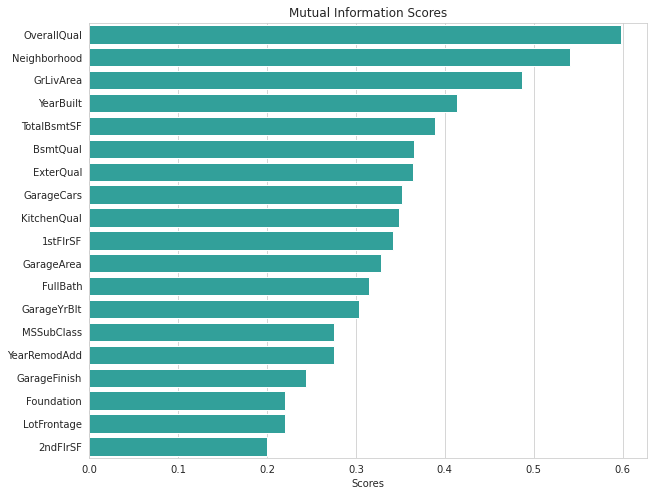

In [26]:
scores_target = plot_scores(train_data, y[0], threshold=0.2)
scores_target

### 3.1.1. Features' filtering: influence on target

We remove the features with scores lower than 0.2:

In [27]:
train_data =  train_data.loc[:,scores_target.index.tolist() + y]
test_data =  test_data.loc[:,scores_target.index]

## 3.2. Features' redundancy

We now look at the features' intercorrelations in order to avoid any possible redundancy in those cases of features showing a mutual strong relationship.

We separate numerical data from categorical data:

In [28]:
num_cols, cat_cols = num_cat_cols(train_data)

train_num = train_data.loc[:,num_cols].dropna().copy()
train_cat = train_data.loc[:, cat_cols].dropna().copy()

### 3.2.1. Numerical data

We look at the existing correlations between numerical features:

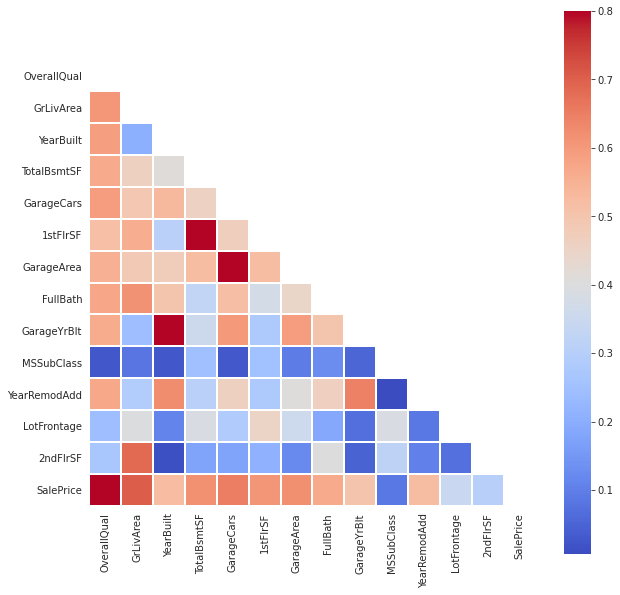

In [29]:
# We compute the correlation matrix
corr_matrix = train_num.corr()
matrix = np.triu(corr_matrix.abs())

# Plot the results in a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix.abs(), vmax=0.8, linewidth=1, linecolor='w', square=True, cmap= 'coolwarm', mask=matrix);

As observed in the previous figure, there exist a high correlation between certain pair of features. It should be noted the high influence of the overall quality in the sale price as we observed before in the mutual correlation scores.

We now look at these pairs of features. As observed, 'GarageYrBlt' and 'YearBuilt' are highly related. This makes sense as one can suppose that in the majority of the cases the garage was built in the same year as the house itself. We can clearly see this relationship in the figure below, where there is an evident linear correlation and proportionality:

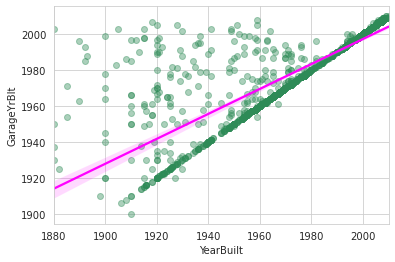

In [30]:
sns.regplot(y='GarageYrBlt', x='YearBuilt', data = train_data, scatter_kws={'color': 'seagreen', 'alpha':0.4}, line_kws={'color': 'magenta'});

We also observed high correlation between '1stFlrSF' and 'TotalBsmtSF'. In the same way, this was to be expected as the first floor normally presents the same size as the basement size. The following picture illustrates the evident linear correlation:

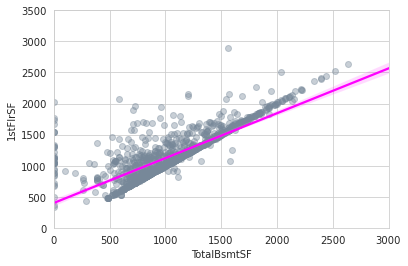

In [31]:
sns.regplot(y='1stFlrSF', x='TotalBsmtSF', data = train_data, scatter_kws={'color': 'lightslategray', 'alpha':0.4}, line_kws={'color': 'magenta'})
plt.ylim(0,3500);
plt.xlim(0,3000);

Finally, we see that garage area is directly proportional to the number of garage cars. This also makes sense, as larger garages will be able to accomodate more cars.

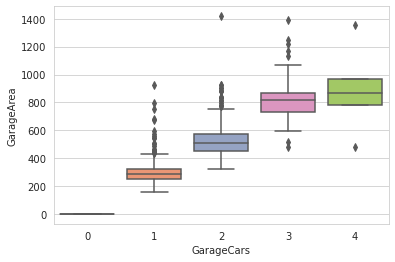

In [32]:
sns.boxplot(data=train_data, y='GarageArea', x ='GarageCars', palette = 'Set2');

### 3.2.2. Features' filtering: numerical data redundancy

Based on the previous observations, we remove one feature of each pair in order to avoid reduncancy in the data. The selection of which feature to keep is based on their mutual information score with respect to the sale price target. In this way, the feature with higher score of each pair is selected to remain and the other is dropped.

In [33]:
# We compute the correlations between the features and 'SalePrice' target
upper_corrmat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

# Remove target value
upper_corrmat.drop(y,axis=1, inplace=True)
upper_corrmat.drop(y,axis=0, inplace=True)
unique_corr_pairs = upper_corrmat.unstack().dropna().sort_values(ascending=False)

# We create a DataFrame of correlation values for each pair of features and the mutual information values w.r.t SalesPrice of each feature
data_corr = []
for f1,f2 in unique_corr_pairs.index:
    [corr_f1, corr_f2] = scores_target[f1], scores_target[f2]
    data_corr.append([corr_f1,corr_f2])
corr_df = pd.DataFrame(data= data_corr, columns = ['corr_f1','corr_f2'])   
corr_df.index = unique_corr_pairs.index

df_corr = pd.concat([unique_corr_pairs, corr_df],axis=1)
df_corr.rename(columns={0: 'mutual_corr'},inplace=True)

# Take into account highly correlated features above 75%
df_corr_filtered = df_corr[df_corr.mutual_corr.abs() > 0.75]
print(df_corr_filtered)

features_to_remove= []

# We select which feature to keep based on the scores w.r.t SalePrice
for corr1,corr2,pair in zip(df_corr_filtered.corr_f1, df_corr_filtered.corr_f2, df_corr_filtered.index):
    if corr1 > corr2:
        features_to_remove.append(pair[1])
    else:
        features_to_remove.append(pair[0])
        
# We drop the redundant features
train_data.drop(features_to_remove, axis=1, inplace=True)
test_data.drop(features_to_remove, axis=1, inplace=True)

print(f'{len(features_to_remove)} features have been removed, now we have {len(train_data.columns)}')
print(f'Removed features are: {list(features_to_remove)}')

                         mutual_corr   corr_f1   corr_f2
GarageArea  GarageCars      0.839818  0.328609  0.351981
1stFlrSF    TotalBsmtSF     0.836835  0.342241  0.389241
GarageYrBlt YearBuilt       0.824558  0.303259  0.413471
3 features have been removed, now we have 17
Removed features are: ['GarageArea', '1stFlrSF', 'GarageYrBlt']


### 3.2.3. Categorical data

We now look at the categorical data and we compute the mutual information scores for each pair.

In [34]:
# Assign labels to non-numerical features
train_cat = label_encoder(train_cat,cat_cols)

df_scores = pd.DataFrame(index=train_cat.columns, columns=train_cat.columns)
df_scores = df_scores.fillna(0)

# We create a matrix with all the mutual information scores
for ft in cat_cols:
    scores = mutual_info_classif(train_cat.loc[:,cat_cols !=ft], train_cat[ft], discrete_features=True, random_state = 1)
    scores = pd.Series(scores, name="Scores", index=train_cat.loc[:,cat_cols != ft].columns)
    scores[ft] = 1
    df_scores[ft] = scores

df_scores

Neighborhood  BsmtQual  ExterQual  KitchenQual  GarageFinish  \
Neighborhood      1.000000  0.458597   0.361958     0.290159      0.271830   
BsmtQual          0.458597  1.000000   0.278506     0.219635      0.180060   
ExterQual         0.361958  0.278506   1.000000     0.345255      0.154247   
KitchenQual       0.290159  0.219635   0.345255     1.000000      0.120004   
GarageFinish      0.271830  0.180060   0.154247     0.120004      1.000000   
Foundation        0.478959  0.278900   0.227936     0.193346      0.155034   

              Foundation  
Neighborhood    0.478959  
BsmtQual        0.278900  
ExterQual       0.227936  
KitchenQual     0.193346  
GarageFinish    0.155034  
Foundation      1.000000

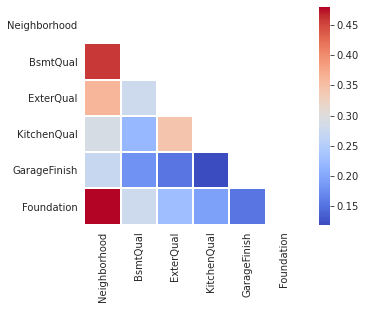

In [35]:
matrix = np.triu(df_scores)
sns.heatmap(df_scores, linewidth=1, linecolor='w', square=True, cmap= 'coolwarm', mask=matrix);

The neighborhood and the basement quality 'BsmtQual' seem to be related. This can also be seen in the figure below, where we can see there is a predominant basement quality in each neighborhood. We can also see there are certain neighborhoods with a noticeable mix of qualitites. For this reason, we decide to keep this feature just in case.

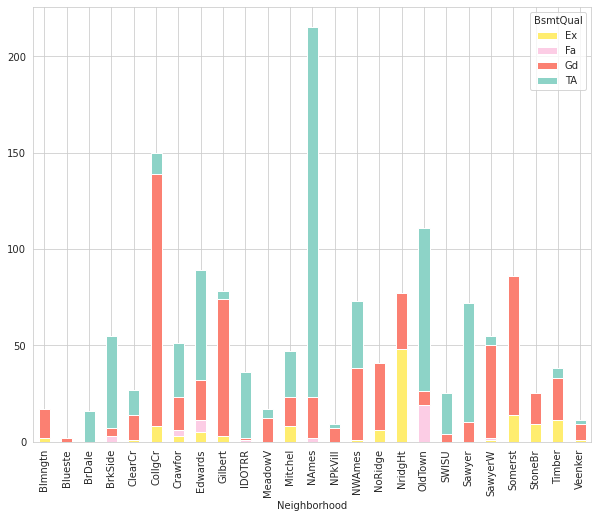

In [36]:
ct = pd.crosstab(train_data['Neighborhood'],train_data['BsmtQual'])
cmap = plt.get_cmap('Set3_r')
colors = cmap(np.linspace(0., 1., len(ct.columns)))
ct.plot.bar(stacked=True, figsize=(10,8), color= colors);

In the same way, we can also see that the neighborhood is related to the foundation of the building. As pbserved in the figure below, there is also a predominant foundation in each neighborhood, although there are certain neighborhoods with a clear variety of those. In the same way as before, we decide to keep those features just in case.

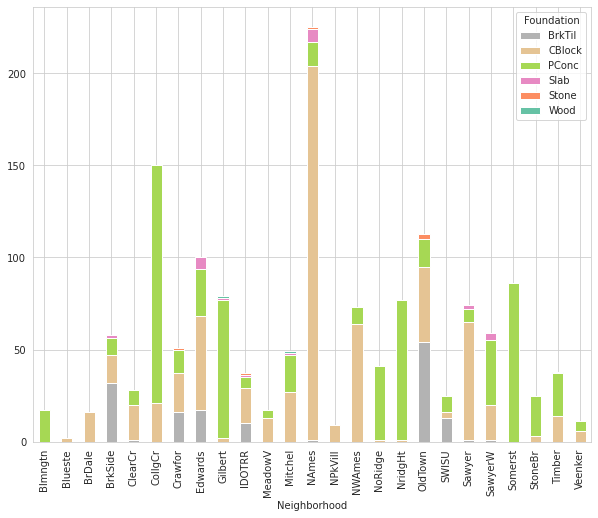

In [37]:
ct = pd.crosstab(train_data['Neighborhood'],train_data['Foundation'])
cmap = plt.get_cmap('Set2_r')
colors = cmap(np.linspace(0., 1., len(ct.columns)))
ct.plot.bar(stacked=True, figsize=(10,8), color= colors);

## 3.3. Set categorical types

We change 'object' type to 'category' type:

In [38]:
num_cols, cat_cols = num_cat_cols(train_data)
train_data[cat_cols] = train_data[cat_cols].apply(lambda x: x.astype('category'))

num_cols, cat_cols = num_cat_cols(test_data)
test_data[cat_cols] = test_data[cat_cols].apply(lambda x: x.astype('category'))

In addition, we also define features 'MSSubClass' and 'OverallQual' as categories:

In [39]:
train_data['MSSubClass'] = pd.Categorical(train_data['MSSubClass'])
train_data['OverallQual'] = pd.Categorical(train_data['OverallQual'])

test_data['MSSubClass'] = pd.Categorical(test_data['MSSubClass'])
test_data['OverallQual'] = pd.Categorical(test_data['OverallQual'])

# 4. Features visualization

 In order to better visualize the influence and relationship between the selected features and the sale price, a series of figures are created:

In [40]:
def make_boxplot(feature1, feature2, dataset=train_data, ordered=False):

    # Chance 'category' type (if any) to 'object' type for visualization purposes
    dataset_obj = dataset.copy()
    cat_cols = dataset_obj.select_dtypes('category').columns
    dataset_obj[cat_cols] = dataset_obj[cat_cols].astype('object')

    # We only select the most repeated values for better visualization
    val_count = dataset_obj[feature2].value_counts()
    condition = val_count > 3
    val_selection = val_count[condition].index.to_list()

    condition2 = dataset_obj[feature2].isin(val_selection)
    df = dataset_obj[condition2]

    # If desired, sort the values in ascending order for the plot
    order = None

    if ordered:
        groups = df.loc[:,[feature1,feature2]].groupby(feature2).mean().sort_values(by=feature1)
        order = groups.index

    # Define the plot   
    plt.figure()
    sns.boxplot(data=df, y=feature1, x =feature2, palette = 'rainbow',order=order)

    return plt.gca(), plt.gcf()

## 4.1. Overall Quality

We start looking at the influence of the overall quality in the sale price. As observed, there is a clear evidente that the prices increase as the quality increases, as was to be expected.

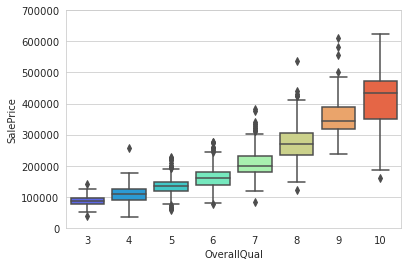

In [41]:
ax,fg = make_boxplot('SalePrice', 'OverallQual')
ax.set_ylim(0,700e3);

## 4.2. Neighborhood

In case of the neighborhoods, we can also see there are certain places whose range of houses' prices are much more expensive than others. 

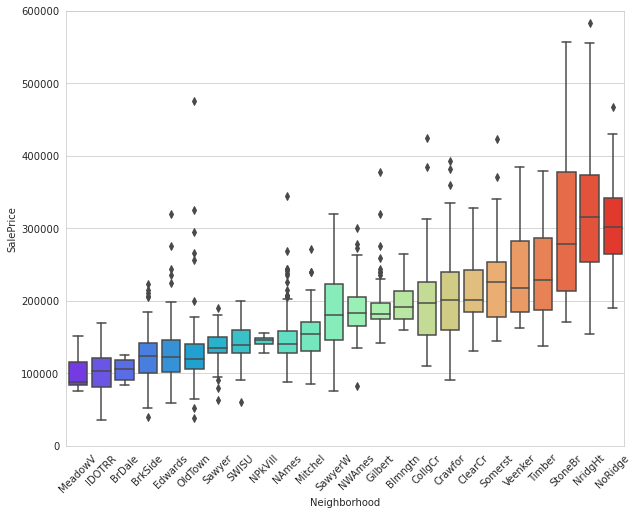

In [42]:
ax,fg =make_boxplot('SalePrice', 'Neighborhood', ordered = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
fg.set_size_inches(10,8)
plt.ylim(0,600e3);

## 4.3. Ground Living Area

If we look at the ground living area, we can see a direct proportionality with respect to the sale price. This is reasonable as larger houses are expected to be more expensive.

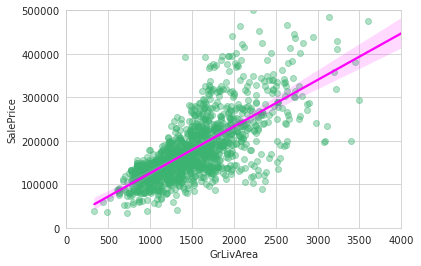

In [43]:
sns.regplot(y='SalePrice', x='GrLivArea', data = train_data, scatter_kws={'color': 'mediumseagreen', 'alpha':0.4}, line_kws={'color': 'magenta'})
plt.ylim(0, 500e3);
plt.xlim(0, 4000);

## 4.4. Total Basement SF and Second Floor SF

The house price also increase with the size of the basement and second floor. As observed, houses bacome cheaper as the basement square-feet (SF) and the second floor SF decreases. As previously seen, this relationship between the prices and the size of different part of the houses is reasonable.

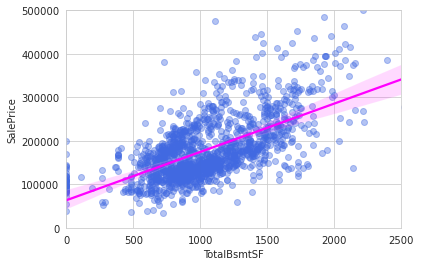

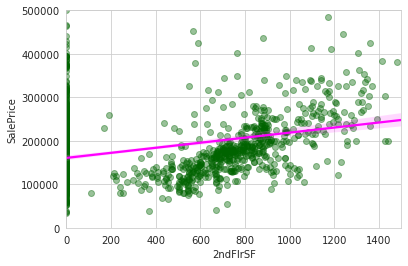

In [44]:
plt.figure()
sns.regplot(y='SalePrice', x='TotalBsmtSF', data = train_data, scatter_kws={'color': 'royalblue', 'alpha':0.4}, line_kws={'color': 'magenta'})
plt.ylim(0, 500e3);
plt.xlim(0,2500);

plt.figure()
sns.regplot(y='SalePrice', x='2ndFlrSF', data = train_data, scatter_kws={'color': 'darkgreen', 'alpha':0.4}, line_kws={'color': 'magenta'})
plt.ylim(0, 500e3);
plt.xlim(0,1500);

## 4.5. Year built and year of remodelation

In the case of the year of construction and year of remodelation, we can also see a direct relationship with the prices. In this way, the newest houses or the ones which have been recently renovated are more expensive. Thus, the prices increase as the year of contruction or remodelation increase too.

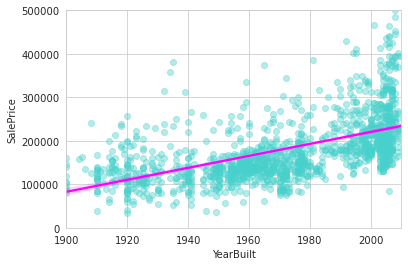

In [45]:
sns.regplot(y='SalePrice', x='YearBuilt', data = train_data, scatter_kws={"color": 'mediumturquoise', 'alpha':0.4}, line_kws={'color': 'magenta'})
plt.ylim(0, 500e3);
plt.xlim(1900,);

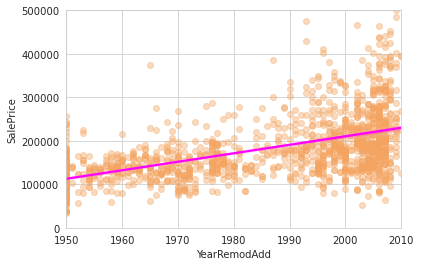

In [46]:
sns.regplot(y='SalePrice', x='YearRemodAdd',data = train_data, scatter_kws={'color': "sandybrown", 'alpha':0.4}, line_kws={'color': 'magenta'})
plt.ylim(0, 500e3);
plt.xlim(1950,);

## 4.6. Basement, External and Kitchen Quality

If we look now at the basement, kitchen and external quality, we can clearly notive that excelent qualitites are the most expensive ones followed by good, typical/average (TA) and fair states. External quality evaluates the quality of the material on the exterior. Again, this makes sense as houses in better conditions are more expensive.

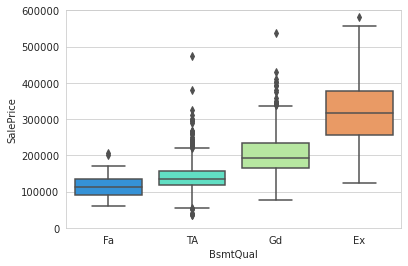

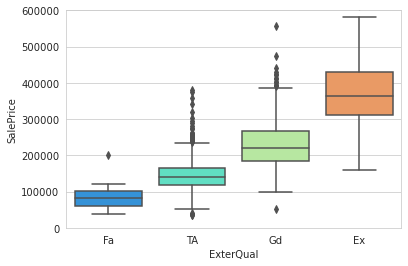

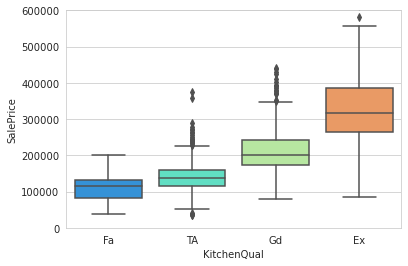

In [47]:
make_boxplot('SalePrice', 'BsmtQual', ordered = True)
plt.ylim(0,600e3);
make_boxplot('SalePrice', 'ExterQual', ordered = True)
plt.ylim(0,600e3);
make_boxplot('SalePrice', 'KitchenQual', ordered = True)
plt.ylim(0,600e3);

## 4.7. Garage cars and Garage finish

Looking at the size of garage in car capacity 'GarageCars' and the interior finish of the garage 'GarageFinish' we can also see a clear difference in the prices. In the case of the number of cars, we can see that houses which allocate more cars tend to be more expensive. Nonetheless, we also observe a decrease of the prices above three cars. In the case of garage finish, we see that unfinished garages are the cheapest ones (Unf) followed by rough finished (RFn) whereas the ones finished (Fin) are the most expensive ones, as expected.

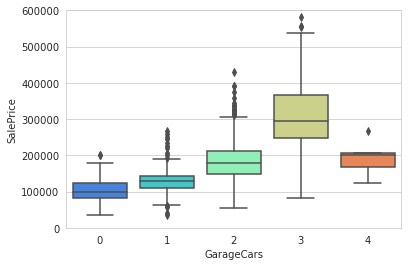

In [48]:
make_boxplot('SalePrice', 'GarageCars')
plt.ylim(0,600e3);

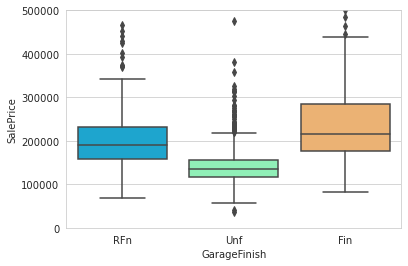

In [49]:
make_boxplot('SalePrice', 'GarageFinish')
plt.ylim(0,500e3);

## 4.8. Full bath

In the case of the number of full bathrooms, we can generally see that higher number of full bathrooms imply higher prices as well. 

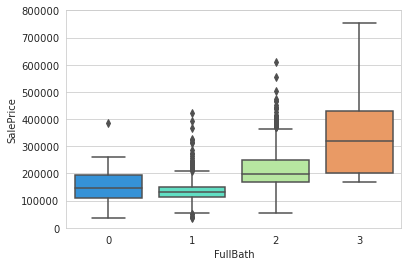

In [50]:
make_boxplot('SalePrice', 'FullBath')
plt.ylim(0,800e3);

## 4.9. MSSubClass

Feature 'MSSubClass' identifies the type of dwelling involved in the sale.

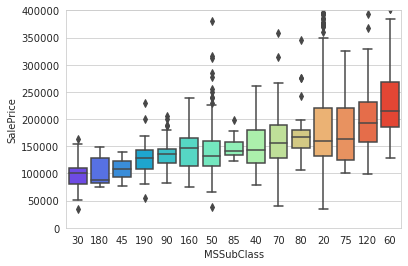

In [51]:
make_boxplot('SalePrice', 'MSSubClass', ordered = True)
plt.ylim(0,400e3);

## 4.10. Foundation

In terms of foundation, we also see an influence on the price. Poured concrete (PConc) is the most expensive material followed by cinder block (CBlock), brick and tile (BrkTil) and slab. We can see that stone foundation is has a wide range with the mean value close to the brick and title mean price, the most expensive ones similar a slighly more expensive than the mean price of poured concrete foundation, and the cheapest ones close to the mean price of slab foundation.

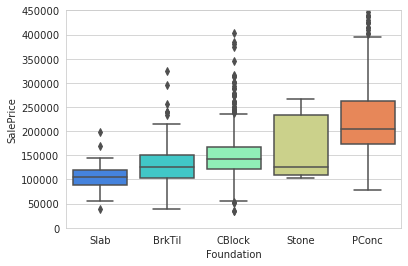

In [52]:
make_boxplot('SalePrice', 'Foundation', ordered = True)
plt.ylim(0,450e3);

## 4.11. LotFrontage

In the case of 'LotFrontage' feature, which represents the linear feet of street connected to property, we can see a general increase with respect to the house price.

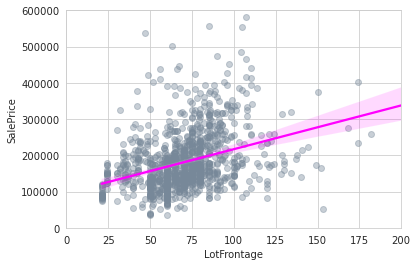

In [53]:
sns.regplot(y='SalePrice', x='LotFrontage', data = train_data, scatter_kws={'color': 'lightslategray', 'alpha':0.4}, line_kws={'color': 'magenta'})
plt.ylim(0,600e3);
plt.xlim(0,200);

# 5. Fill missing data

## 5.1 Train data

Let's now check characteristics of features with more than 5% of missing data:

In [54]:
def df_ft_missing(dataset, threshold):
    df_missing = check_missing(dataset)
    ft_missing = list(df_missing[df_missing['Percentage %'] >= threshold].index)
    print(pd.DataFrame(data= zip(dataset[ft_missing].dtypes, dataset[ft_missing].nunique()), columns = ['Type', 'UniqueVals'], index = ft_missing))

    return ft_missing

In [55]:
ft_missing_train = df_ft_missing(train_data, 5)

                  Type  UniqueVals
LotFrontage    float64         110
GarageFinish  category           3


We now define a function with the objective of filling the missing values. To to so, we first find the most influential features of the one we intend to fill, and group the data based on this selection. Then,the mean value of the feature to fill is computed based on this agroupation of the most influential features, in the case of categorical data we would use the most repeated category. These computed values are then used to fill the missing data, taking into account for each sample the values of the most related features.

In oder to make groups of continuous features, we split the data into bins. To this end, we create a function that will be used in main function for filling missing data.

In [56]:
def make_bins(fts, dataset):
    for ft in fts:
        dataset.loc[:,ft] = pd.cut(dataset.loc[:,ft], bins = 10)
    return dataset

In [57]:
def fill_na(ft_missing, dataset, num_relevant_fts):

    X = dataset.copy()
    for ft in ft_missing: 

        scores = make_scores(X, ft)

        # Keep the three best scores
        best_fts = scores.sort_values(ascending = False)[:num_relevant_fts].index.tolist()
        print(f'Filling missing values of "{ft}" based on features: {best_fts}')

        X_copy = X.loc[:,best_fts+[ft,]].copy()

        X_copy.loc[:,best_fts] = make_bins(X_copy.loc[:,best_fts].select_dtypes(include=['int64', 'float64']).columns, X_copy.loc[:,best_fts])
        print(f'Bins made for features: {best_fts}')


        if X_copy[ft].dtype in ('float64', 'int64'): 
            ft_bygroup = X_copy.groupby(best_fts)[ft].median()
        else: 
            ft_bygroup = X_copy.groupby(best_fts)[ft].apply(pd.Series.mode)
            ft_bygroup = ft_bygroup.droplevel(num_relevant_fts)
            #ft_bygroup.fillna('Missing',inplace=True)
        print(f'Groups made for features: {best_fts}')


        if num_relevant_fts == 3:
            for (ft1, ft2, ft3), ft_fill in ft_bygroup.items():        
                condition = (X_copy.loc[:,best_fts] == (ft1,ft2,ft3)).sum(axis=1) == 3
                X_copy.loc[condition,:] = X_copy.loc[condition,:].fillna({ft: ft_fill}).copy()
                dataset.loc[:,ft] = X_copy.loc[:,ft].copy()
        else:
            for (ft1, ft2), ft_fill in ft_bygroup.items():        
                condition = (X_copy.loc[:,best_fts] == (ft1,ft2)).sum(axis=1) == 2
                X_copy.loc[condition,:] = X_copy.loc[condition,:].fillna({ft: ft_fill}).copy()
                dataset.loc[:,ft] = X_copy.loc[:,ft].copy()

        print(f'-------------Missing "{ft}" filled-------------')

    print('--------------------------------------End of filling process--------------------------------------')
    return dataset

We now apply the function to the train data and we save the target values of sale price separately.

In [58]:
X_train = train_data.copy().drop(y,axis=1)
y_train = train_data[y].copy()

X_train = fill_na(ft_missing_train, X_train, num_relevant_fts=3);

Filling missing values of "LotFrontage" based on features: ['Neighborhood', 'MSSubClass', 'YearBuilt']
Bins made for features: ['Neighborhood', 'MSSubClass', 'YearBuilt']
Groups made for features: ['Neighborhood', 'MSSubClass', 'YearBuilt']
-------------Missing "LotFrontage" filled-------------
Filling missing values of "GarageFinish" based on features: ['YearBuilt', 'Neighborhood', 'MSSubClass']
Bins made for features: ['YearBuilt', 'Neighborhood', 'MSSubClass']
Groups made for features: ['YearBuilt', 'Neighborhood', 'MSSubClass']
-------------Missing "GarageFinish" filled-------------
--------------------------------------End of filling process--------------------------------------


We check again the remaining missing data:

In [59]:
check_missing(X_train)

Missing Values  Percentage %
BsmtQual                  37           2.5
LotFrontage               35           2.4
GarageFinish              22           1.5

We can see that now none of the features have missing values above 5% of the total data. As noticed, not all missing values of the features selected could be filled. This is because no value was found based on the spefic group of influential features in those cases. Let's now fetch those remaining features with more than 1% missing values and fill them using the two most influential features instead of three.

In [60]:
ft_missing_train = df_ft_missing(X_train, 1)
X_train = fill_na(ft_missing_train, X_train, num_relevant_fts=2);

                  Type  UniqueVals
BsmtQual      category           4
LotFrontage    float64         120
GarageFinish  category           3
Filling missing values of "BsmtQual" based on features: ['YearBuilt', 'Neighborhood']
Bins made for features: ['YearBuilt', 'Neighborhood']
Groups made for features: ['YearBuilt', 'Neighborhood']
-------------Missing "BsmtQual" filled-------------
Filling missing values of "LotFrontage" based on features: ['Neighborhood', 'MSSubClass']
Bins made for features: ['Neighborhood', 'MSSubClass']
Groups made for features: ['Neighborhood', 'MSSubClass']
-------------Missing "LotFrontage" filled-------------
Filling missing values of "GarageFinish" based on features: ['Neighborhood', 'YearBuilt']
Bins made for features: ['Neighborhood', 'YearBuilt']
Groups made for features: ['Neighborhood', 'YearBuilt']
-------------Missing "GarageFinish" filled-------------
--------------------------------------End of filling process--------------------------------------


We check the missing data again and we can see the number of missing values has clearly been reduced below 1%:

In [61]:
check_missing(X_train)

Missing Values  Percentage %
LotFrontage               10           0.7
GarageFinish               4           0.3

## 5.2. Test data

We now do the same with the test data, we fisrt look at the remaining missing values:

In [62]:
ft_missing_test = df_ft_missing(test_data, 5)

                  Type  UniqueVals
LotFrontage    float64         115
GarageFinish  category           3


We now apply the filling function based on three influential features:

In [63]:
test_data = fill_na(ft_missing_test, test_data, num_relevant_fts=3);

Filling missing values of "LotFrontage" based on features: ['Neighborhood', 'MSSubClass', 'YearBuilt']
Bins made for features: ['Neighborhood', 'MSSubClass', 'YearBuilt']
Groups made for features: ['Neighborhood', 'MSSubClass', 'YearBuilt']
-------------Missing "LotFrontage" filled-------------
Filling missing values of "GarageFinish" based on features: ['Neighborhood', 'YearBuilt', 'MSSubClass']
Bins made for features: ['Neighborhood', 'YearBuilt', 'MSSubClass']
Groups made for features: ['Neighborhood', 'YearBuilt', 'MSSubClass']
-------------Missing "GarageFinish" filled-------------
--------------------------------------End of filling process--------------------------------------


Let's check the reamining missing data:

In [64]:
check_missing(test_data)

Missing Values  Percentage %
BsmtQual                  44           3.0
LotFrontage               30           2.1
GarageFinish              21           1.4
TotalBsmtSF                1           0.1
GarageCars                 1           0.1
KitchenQual                1           0.1

We grab those features with missing values above 1% and fill them using their two most influential features:

In [65]:
ft_missing_test = df_ft_missing(test_data, 1)
test_data = fill_na(ft_missing_test, test_data, num_relevant_fts=2);

                  Type  UniqueVals
BsmtQual      category           4
LotFrontage    float64         124
GarageFinish  category           3
Filling missing values of "BsmtQual" based on features: ['YearBuilt', 'Neighborhood']
Bins made for features: ['YearBuilt', 'Neighborhood']
Groups made for features: ['YearBuilt', 'Neighborhood']
-------------Missing "BsmtQual" filled-------------
Filling missing values of "LotFrontage" based on features: ['Neighborhood', 'MSSubClass']
Bins made for features: ['Neighborhood', 'MSSubClass']
Groups made for features: ['Neighborhood', 'MSSubClass']
-------------Missing "LotFrontage" filled-------------
Filling missing values of "GarageFinish" based on features: ['Neighborhood', 'YearBuilt']
Bins made for features: ['Neighborhood', 'YearBuilt']
Groups made for features: ['Neighborhood', 'YearBuilt']
-------------Missing "GarageFinish" filled-------------
--------------------------------------End of filling process--------------------------------------


In the same way as before, we have achieved to reduce the missing data to very low percentages:

In [66]:
check_missing(test_data)

Missing Values  Percentage %
LotFrontage              13           0.9
BsmtQual                  3           0.2
TotalBsmtSF               1           0.1
GarageCars                1           0.1
KitchenQual               1           0.1

We can see that now none of the features have missing values above 1% of the total data.

# 6. Training Models

# 6.1. Pipeline

In this section, we define the pipeline containing the necessary data preprocessing and training model. Firstly, we define the preprocessing step involving the column transformations. Here, the remaining missing data is imputed using the median value in the case of numerical features and the most frequent category in case of categorical data. Then, a standard scaler applied to the numerical features to set the mean value in zero and a standard deviation of one of the whole feature distributions. This is done in order to accelerate the model learning and also facilitate the convergence of results. In the case of categorical values, label enconding using one hot enconder is applied in order to properly treat these data.

In [67]:
num_cols, cat_cols = num_cat_cols(X_train)

# Scale the numerical data
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scale', StandardScaler())])

# Assign labels to categorical data
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown= 'ignore'))])

# Preprocessing: scaling and labeling of columns
preprocessing = ColumnTransformer(transformers=[('num', num_transformer, num_cols),('cat', cat_transformer, cat_cols)])

In order to evaluate the performance of the model. we will use cross-valitation. In this way, the data is be further splitted into a train and validation dataset. The former is employed for training the model and the latter is used for making predictions based on the output obtained from the training process. The assement of the model is done by computing the absolute mean error (MAE) of the algorithm in both the training and validation dataset. This whole process is repeatedly done in order to obtain a series of values out of which we can calculate the mean MAE and their standard deviation. The repetition of this process ensures better representation of the data and does not only rely on an unique choice of training samples which could reflect the features' distribution properly. Hence, more reliability is achieved by looking at different subsets.

Furthermore, learning curves are computed also based on cross-validation. Learning curves are important in order to evaluate if overfitting or underfitting would take place. The latter implies poor performance on the training data and thus the model needs to more refined to achieve a satisfactory accuracy. The former however implies that the model performs quite well on the training data but is not good for generalising, that is, it is too sensible to any changes in the data and does not lead to good predictions when applied to new values. In this case, the learning curves illustrate the accuracy variation as a function of number of the training samples for both the validation and training data. If both accuracies converge to a value together and the accuracy value is high, the model will be suitable for future predictions. However, if the accuracies converge to a low value means that the model is underfitting. In the case of overfitting, no convergence is achieved and there a gap remains between the training and validation accuracies.

As aforementioned, a series of regression models are tested and a selection is based based on their accuracy. In addition, an evaluation of model's parameters is done in order to improve the performance.

In [68]:
def plot_val_curve(model_name, param_name, param_list, get_train_test_scores, X_train, y_train, my_pipeline):
    
    train_scores, val_scores = get_train_test_scores(model_name, my_pipeline, X_train, y_train, param_name, param_list)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = -np.std(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)
    val_scores_std = -np.std(val_scores, axis=1)

    pos_max = np.argmax(val_scores_mean)
    
    print(f'The minimum MAE achieved in validation set is {round(np.min(val_scores_mean),1)} dollars with {param_name}={param_list[pos_max]}')

    global alpha_min
    alpha_min = param_list[pos_max]

    plt.figure()
    plt.title(f'{model_name} - Validation Curve')

    plt.xlabel(f'{param_name}')
    plt.ylabel('Score')
    plt.ylim([16000,24000])

    plt.grid(True)
    lw=2

    plt.semilogx(param_list, train_scores_mean, label='Training score', color='lightgreen', lw=lw)
    plt.fill_between(param_list, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='lightgreen', lw=lw)
    plt.semilogx(param_list, val_scores_mean, label='Cross-validation score', color='hotpink', lw=lw)
    plt.fill_between(param_list, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='hotpink', lw=lw)

    plt.legend(loc="best")
    
    return plt.gcf(), plt.gca()

In [69]:
def get_train_test_scores(model_name, my_pipeline, X_train, y_train, param_name, param_list):
    param_name_transform = model_name.lower().replace(" ", "") + '__' + param_name
    
    print(f'{model_name}: {param_name} parameter variation.')

    train_scores, val_scores = validation_curve(my_pipeline, X_train, y_train, 
                                             param_name =param_name_transform,
                                             param_range = param_list, cv = 5, scoring= 'neg_mean_absolute_error')

    return train_scores, val_scores

In [70]:
def plot_learning_curve(model_name, X_train, y_train, my_pipeline):

    train_sizes, train_scores, test_scores = learning_curve(my_pipeline, X_train, y_train, cv = 5, scoring= 'neg_mean_absolute_error')

    train_scores_mean = np.mean(-1*train_scores, axis=1)
    train_scores_std = np.std(-1*train_scores, axis=1)
    val_scores_mean = np.mean(-1*test_scores, axis=1)
    val_scores_std = np.std(-1*test_scores, axis=1)

    plt.figure()
    plt.title(f'{model_name} - Learning Curve')

    plt.xlabel('Training samples')
    plt.ylabel('Score')
    plt.ylim([10000,28000])

    plt.grid(True)
    lw=2

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color='darkturquoise')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2,color='darkturquoise', lw=lw)
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation score', color= 'darkorange')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='darkorange', lw=lw)

    print(f'The minimum MAE achieved in validation set is {round(np.min(val_scores_mean),1)} dollars')
    

    plt.legend(loc="best")

    return plt.gcf(), plt.gca()

## 6.2. Linear Regression

The first training model is linear regression. As the name indicates, this model is based on a simple linear approximation of the data to the target and by minimizing the residual sum of squares between the observed targets in the dataset.

In [71]:
reg_model = LinearRegression()
my_pipeline = make_pipeline(preprocessing,reg_model)

The minimum MAE achieved in validation set is 19712.0 dollars


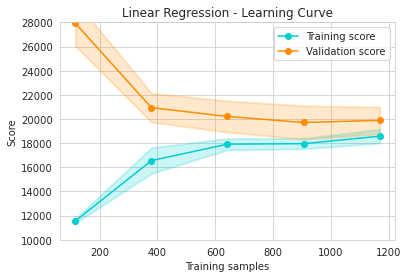

In [72]:
# Plot learning curves
plot_learning_curve('Linear Regression', X_train, y_train, my_pipeline);

The learning curve shows how both the training and validation scores get closer to a convergence MAE point. This means that the model provides good performance in terms of overfitting. Moreover, the convergence is close to a MAE of 20k dollars, which is a good value considering the mean and median values of the sale price:

In [73]:
y_mean = y_train.mean().iloc[0];
print(f'The mean sale price value is: {round(y_mean,2)} dollars');

The mean sale price value is: 180921.2 dollars


In [74]:
y_median = y_train.median().iloc[0];
print(f'The median sale price value is: {round(y_median,2)} dollars');

The median sale price value is: 163000.0 dollars


## 6.3. Ridge Regression

Ridge model is a regression model also based on the linear least squares function with a regularization term which allows better control of model performance and variace in the results. The latter follows the L2 regularization which is based on the square of the magnitude of the coefficients. The regularization parameter to consider in this case is the regularization strength alpha, which is a positive float. In this way, increasing alpha implies higher regularization applied to the model.

Ridge: alpha parameter variation.
The minimum MAE achieved in validation set is 19597.3 dollars with alpha=100


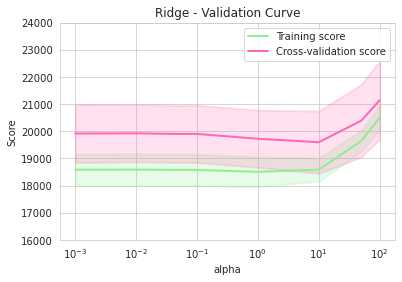

In [75]:
# Regularization strength 
alpha_list = [0.001, 0.01, 0.05, 0.1, 1, 10, 50, 100]

reg_model = Ridge(random_state=0)
my_pipeline = make_pipeline(preprocessing,reg_model)
plot_val_curve('Ridge', 'alpha', alpha_list, get_train_test_scores, X_train, y_train, my_pipeline);

As observed in the results, alpha=100 provides the minimum MAE values, thus it offers the best results.

The minimum MAE achieved in validation set is 19603.1 dollars


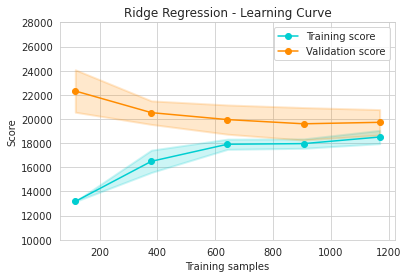

In [76]:
# Plot learning curves
reg_model = Ridge(alpha=100, random_state=0)
plot_learning_curve('Ridge Regression', X_train, y_train, my_pipeline);

As observed in the learning curve, both the validation and training scores are close to convergence to a MAE score. Thus, the model generally provides good performance.

## 6.4. Lasso Regression

Lasso model is another regression model also based on the regularization of linear least squares function. The regularization step in this model follows a different formulation known as L1. In this case, the regularization term is based on the absolute sum of weight coefficients. In the same way as before, the amount of regularization depends on the regularization strength alpha.

Lasso: alpha parameter variation.
The minimum MAE achieved in validation set is 19440.6 dollars with alpha=1


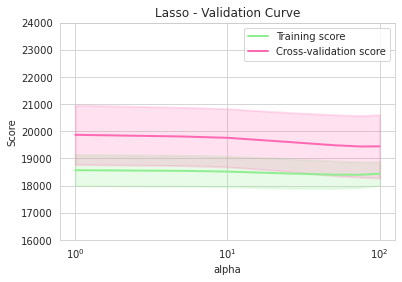

In [77]:
alpha_list = [1, 5, 10, 25, 50, 75, 100]

reg_model = Lasso(max_iter=10000, random_state=0)
my_pipeline = make_pipeline(preprocessing,reg_model)
plot_val_curve('Lasso', 'alpha', alpha_list, get_train_test_scores, X_train, y_train, my_pipeline);

The minimum MAE achieved in validation set is 19689.5 dollars


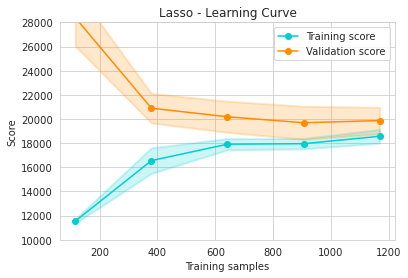

In [78]:
# Plot learning curves
reg_model = Lasso(alpha=1, random_state=0)
plot_learning_curve('Lasso', X_train, y_train, my_pipeline);

Overall convergence is achieved and therefore good performance of the training model.

## 6.5. Neural Networks

Let's now apply a simple neural network to the data which consists of an input layer, three hidden layers and one output layer. In order to evaluate its performance, we compute and plot the loss as a function of the epoch hyperparameter, which represents how many times the learning algorithm works through the entire training dataset. In the same way, the batch size hyperparameter is set, which represents the number of samples to work through before updating the internal model parameters. In this case, we are going to define a function whose input parameters allows to easily change the activation function, optimizer and number of units per hidden layer. 

In [79]:
def make_NN(dataset, target, num_units, act_function, optimizer, validation = False):
    X_NN = preprocessing.fit_transform(dataset)
    X_NN = X_NN.toarray() # Convert to array for compatibility issues

    # We split the datainto a training and validation datasets
    if validation: 
        t_X, v_X, t_y, v_y = train_test_split(X_NN, target, random_state = 0)
    else:
        t_X = X_NN
        t_y = target

    # We define the model and layers
    NN_model = keras.Sequential([
        # the hidden layers
        layers.Dense(units=num_units, activation=act_function, input_shape=[t_X.shape[1]]),
        layers.Dense(units=num_units, activation=act_function),
        layers.Dense(units=num_units, activation=act_function),
        # the linear output layer 
        layers.Dense(units=1),
    ])
     
    # Model compilation
    NN_model.compile(optimizer=optimizer, loss='mae')

    # Early stopping is defined in order to stop the computation if convergence is achieved before running through all epochs
    early_stopping = callbacks.EarlyStopping(min_delta=0.001, # tolerance
                                             patience=20, # minumm epochs before stopping
                                             restore_best_weights=True,)

    if validation:
        model_fit= NN_model.fit(t_X, t_y, batch_size=128, epochs= 400, validation_data=(v_X, v_y), callbacks=[early_stopping], verbose=0)
    else:
        model_fit= NN_model.fit(t_X, t_y, batch_size=128, epochs= 175,verbose=0)

    log_df = pd.DataFrame(model_fit.history)
    print(log_df.iloc[-1, :])

    return NN_model, log_df

In [80]:
def plot_loss_NN(log_df):

    # Plot loss figure
    plt.figure()

    sns.lineplot(y= log_df['loss'], x=log_df.index, linewidth = 3)
    sns.lineplot(y= log_df['val_loss'], x=log_df.index, linewidth = 3)
    plt.title('MAE - Neural Networks')
    plt.xlabel('Epochs')
    plt.legend(labels=['Training score', 'Validation score'])

loss        16982.802734
val_loss    19566.289062
Name: 171, dtype: float64


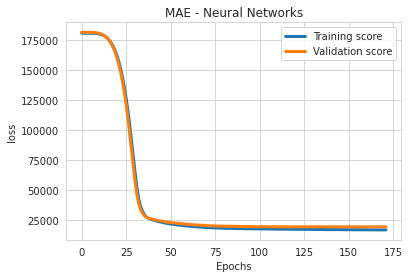

In [81]:
# We use the ReLU activation function and adam optimizer in layers with sixty-four units
NN_model, log_df = make_NN(X_train, y_train, num_units = 64, act_function = 'relu', optimizer= 'adam', validation=True)

plot_loss_NN(log_df)

As observed, the loss value rapidly decreases with the number of epochs for both the training and validation sets until a converged value around 17k and 19k for the training and validation data respectively. We can also see the number of necessary epochs which is enough to assure data convergence in this case.

## 6.6. Polynomial Regression

We can also use linear regression after applying a polynomial transformation to the data. Let's try and see what happends by creating polynomial features of degrees 2 and 3 to the numerical columns. In this case, we are going to use Ridge regression.

----------------Polynomial degree:2----------------
Ridge: alpha parameter variation.
The minimum MAE achieved in validation set is 18954.6 dollars with alpha=100
The minimum MAE achieved in validation set is 19076.3 dollars
----------------Polynomial degree:3----------------
Ridge: alpha parameter variation.
The minimum MAE achieved in validation set is 20075.7 dollars with alpha=0.001
The minimum MAE achieved in validation set is 21263.2 dollars


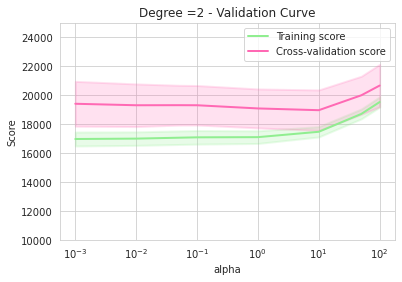

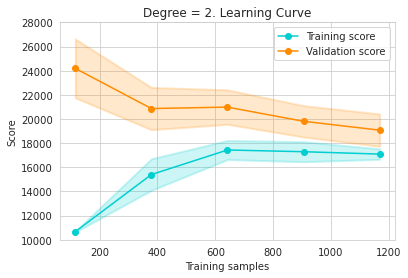

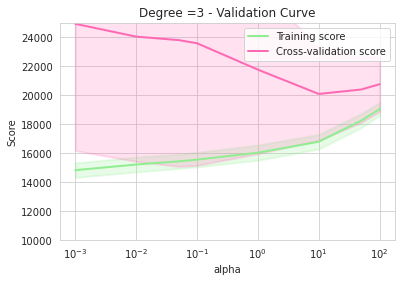

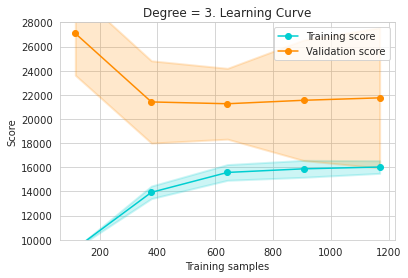

In [82]:
# We fetch the numerical and categorical columns
num_cols, cat_cols = num_cat_cols(X_train)

# Make a copy of the numerical columns of the training data and fill the remaining missing values
data_num = X_train.loc[:,num_cols].copy()
data_num.fillna(data_num.median(),inplace=True)

degree_list = [2,3]

for deg in degree_list:

    print(f'----------------Polynomial degree:{deg}----------------')

    # Apply polynomial transformation to numerical data 
    data = data_num.copy()
    y_train_poly = y_train.copy()

    poly=PolynomialFeatures(degree=deg)
    data = poly.fit_transform(data)
    dataset = pd.DataFrame(data)

    num_cols_poly = poly.get_feature_names(num_cols)
    dataset.columns = num_cols_poly
    X_train_poly = pd.concat([dataset.iloc[:,1:], X_train.loc[:,cat_cols].copy()],axis=1)

    # Update categorical and numerical column names
    num_cols_poly, cat_cols_poly = num_cat_cols(X_train_poly)

    # Scale the numerical data
    num_transformer_poly = Pipeline(steps=[('scale', StandardScaler())])
    # Preprocessing: scaling and labeling of categorical columns
    preprocessing_poly = ColumnTransformer(transformers=[('num', num_transformer_poly, num_cols_poly),('cat', cat_transformer, cat_cols_poly)])

    # Apply Ridge regression
    reg_model = Ridge(random_state=0)
    my_pipeline = make_pipeline(preprocessing_poly, reg_model)

    alpha_list = [0.001, 0.01, 0.05, 0.1, 1, 10, 50, 100]
    fig, ax = plot_val_curve('Ridge', 'alpha', alpha_list, get_train_test_scores, X_train_poly, y_train_poly, my_pipeline);
    ax.set_title(f'Degree ={deg} - Validation Curve')
    ax.set_ylim(10000,25000)

    reg_model = Ridge(alpha=alpha_min, random_state=0)
    fig, ax = plot_learning_curve('Linear Regression', X_train_poly, y_train_poly, my_pipeline);
    ax.set_title(f'Degree = {deg}. Learning Curve')

We can see that the MAE slighly improves when using degree = 2, however the gap between the validation and training sets in the learning curve plot is more pronounced compared to previous results and thus this model has higher risk of overfitting. In addition, it can be seen that degree = 3 does not lead to considerable improvment of the MAE and clearly performs worse in terms of overfitting as seen in the large gap present in the validation curve.

# 7. Test data - make predictions

Finally, we apply the training model to the test data to predict the sale prices. In this case, we select the ridge regression model and the neural networks:

## 7.1. Ridge Regression

In [83]:
#Ridge Regression
reg_model = Ridge(alpha=100, random_state=0)
my_pipeline = make_pipeline(preprocessing, reg_model)
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', 'FullBath',
       'YearRemodAdd', 'LotFrontage', '2ndFlrSF'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                          

For better visualization, we gather the predicted prices into a series bins representing diverse price ranges:

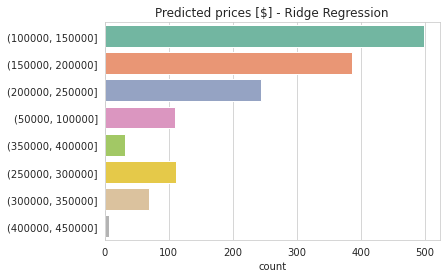

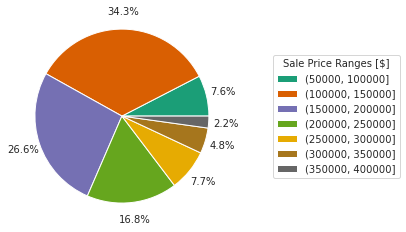

In [84]:
# We predic the target from the test dataset
y_pred = my_pipeline.predict(test_data)

# Make bins 
bins=np.arange(0, 800000, 50000)
y_pred_bins = pd.cut(y_pred.reshape(-1), bins = bins)

# We select the most representative bins for better visualization
bin_count_RR = y_pred_bins.value_counts()
bins2plot = bin_count_RR[bin_count_RR > max(bin_count_RR)*0.01].index
y_pred_2plot = y_pred_bins[y_pred_bins.isin(bins2plot)]

# Plot the results
sns.countplot(y=y_pred_2plot.astype('object'), orient='h', palette = 'Set2');
plt.title('Predicted prices [$] - Ridge Regression')

# Pie chart
plt.figure(figsize=(4,4))
bins_chart = bin_count_RR[bin_count_RR > max(bin_count_RR)*0.03]
cmap = plt.get_cmap('Dark2')
colors = cmap(np.linspace(0., 1., len(bins_chart)))
bins_chart.plot.pie(autopct="%.1f%%", pctdistance= 1.2, legend=True, labels=None, colors= colors);
plt.ylabel("")
labels = bins_chart.index
plt.legend(labels, loc='center right', title= 'Sale Price Ranges [$]', bbox_to_anchor=(1.8, 0.5));

## 7.2. Neural Networks

In [85]:
NN_model, log_df =  make_NN(X_train, y_train, num_units=64, act_function='relu', optimizer='adam')
X_test = preprocessing.transform(test_data)

loss    17243.220703
Name: 174, dtype: float64


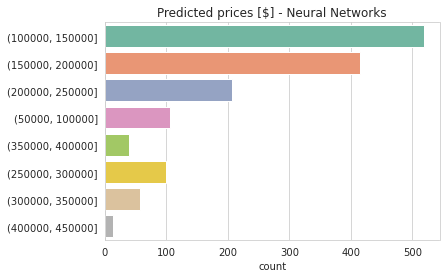

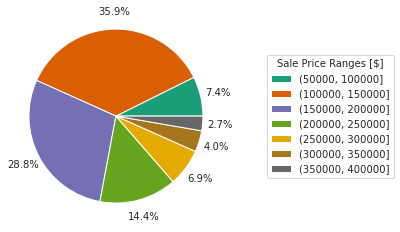

In [86]:
# We predict the target from the test dataset
y_pred = NN_model.predict(X_test)

# Make bins
y_pred_bins = pd.cut(y_pred.reshape(-1), bins = bins)

# We select the most representative bins for better visualization
bin_count_NN = y_pred_bins.value_counts()
bins2plot = bin_count_NN[bin_count_NN > max(bin_count_NN)*0.01].index
y_pred_2plot = y_pred_bins[y_pred_bins.isin(bins2plot)]

# Plot the results
sns.countplot(y=y_pred_2plot.astype('object'), orient='h', palette = 'Set2');
plt.title('Predicted prices [$] - Neural Networks')

# Pie chart
plt.figure(figsize=(4,4))
bins_chart = bin_count_NN[bin_count_NN > max(bin_count_NN)*0.03]
cmap = plt.get_cmap('Dark2')
colors = cmap(np.linspace(0., 1., len(bins_chart)))
bins_chart.plot.pie(autopct="%.1f%%", pctdistance= 1.2, legend=True, labels=None, colors= colors);
plt.ylabel("")
labels = bins_chart.index
plt.legend(labels, loc='center right', title= 'Sale Price Ranges [$]', bbox_to_anchor=(1.8, 0.5));

## 7.3. Summary of results

A comparison and summary of the results are gathered in table for both the Ridge Regression algorithm and the Neural Networks:

In [87]:
NN_per = bin_count_NN.apply(lambda x: round(x*100/sum(bin_count_NN),2))
RR_per = bin_count_RR.apply(lambda x: round(x*100/sum(bin_count_RR),2))
df_results = pd.concat([NN_per,RR_per],axis=1, keys=['NeuralNetworks [%]','RidgeRegression [%]'])
df_results.index.name = 'SalePrice Bins [$]'
df_results

NeuralNetworks [%]  RidgeRegression [%]
SalePrice Bins [$]                                         
(0, 50000]                        0.07                 0.07
(50000, 100000]                   7.27                 7.54
(100000, 150000]                 35.50                34.13
(150000, 200000]                 28.44                26.46
(200000, 250000]                 14.19                16.72
(250000, 300000]                  6.85                 7.68
(300000, 350000]                  3.91                 4.73
(350000, 400000]                  2.67                 2.19
(400000, 450000]                  0.96                 0.41
(450000, 500000]                  0.07                 0.00
(500000, 550000]                  0.00                 0.00
(550000, 600000]                  0.07                 0.07
(600000, 650000]                  0.00                 0.00
(650000, 700000]                  0.00                 0.00
(700000, 750000]                  0.00                 0.00